# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [134]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [135]:
#lets see how the dataset looks like
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [136]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [137]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [138]:
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

### As we can see null values its better to remove them 


In [139]:
penguins_clean = penguins_df.dropna()

In [140]:
penguins_clean.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### lets find out the outliers and remove them

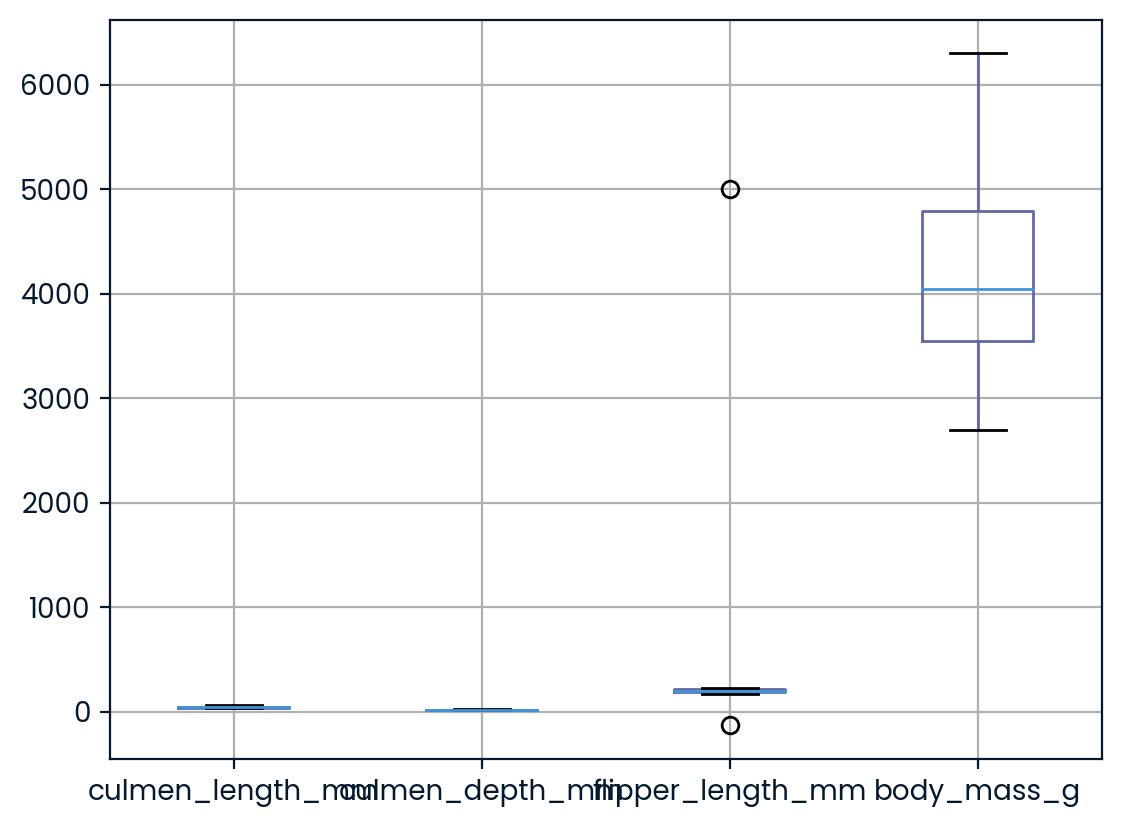

In [141]:
penguins_clean.boxplot()
plt.show()

In [142]:
penguins_clean[penguins_clean['flipper_length_mm']>4000],penguins_clean[penguins_clean['flipper_length_mm']<0]


(   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 9              42.0             20.2             5000.0       4250.0  MALE,
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
 14              34.6             21.1             -132.0       4400.0  MALE)

In [143]:
# now lets drop the outliers
penguins_clean = penguins_clean.drop([9,14], axis = 0)


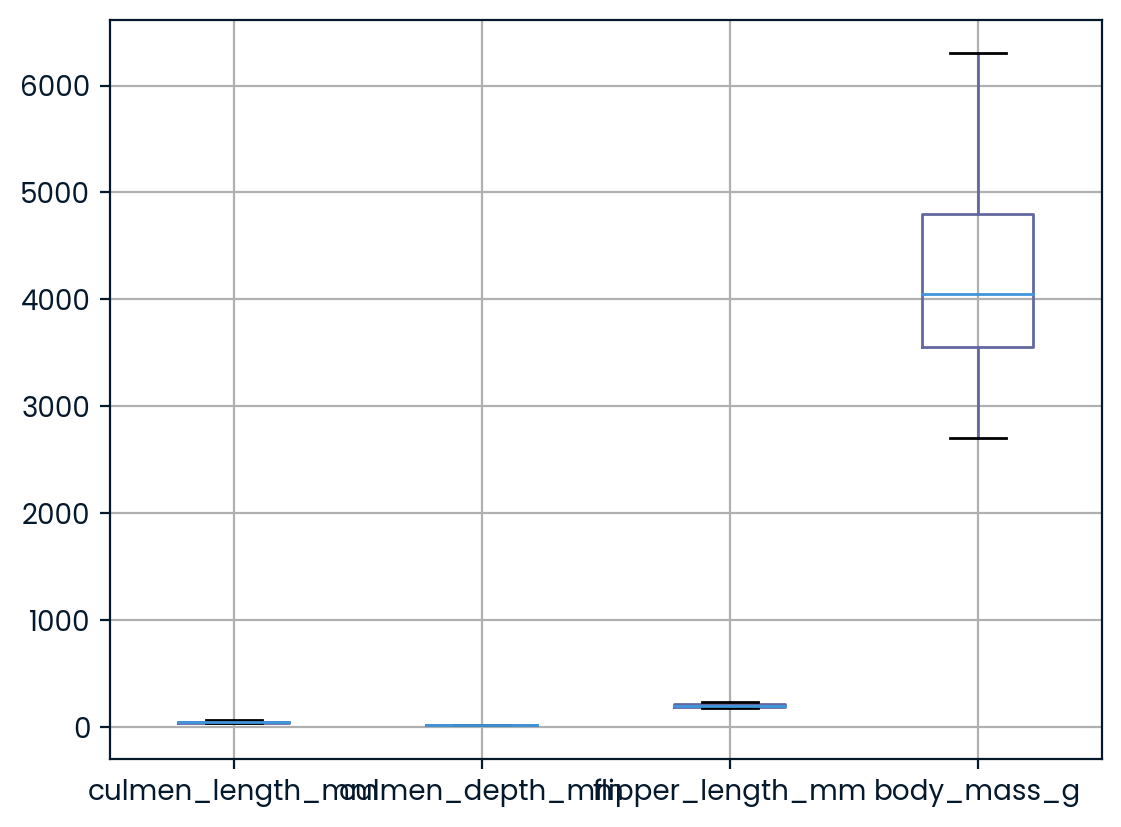

In [144]:
penguins_clean.boxplot()
plt.show()

In [145]:
## since there is one categorical column replacing it with one hot encodding
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
#while using get_dummies it itself convert all categorical columns no need to specify the specifit column names

In [146]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [147]:
## lets perform the preprocessing steps
scaler = StandardScaler()
X = scaler.fit_transform(df)
X


array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

In [148]:
## lets save the transformed data into penguins_preprocessed 
penguins_preprocessed = pd.DataFrame(X, columns = df.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


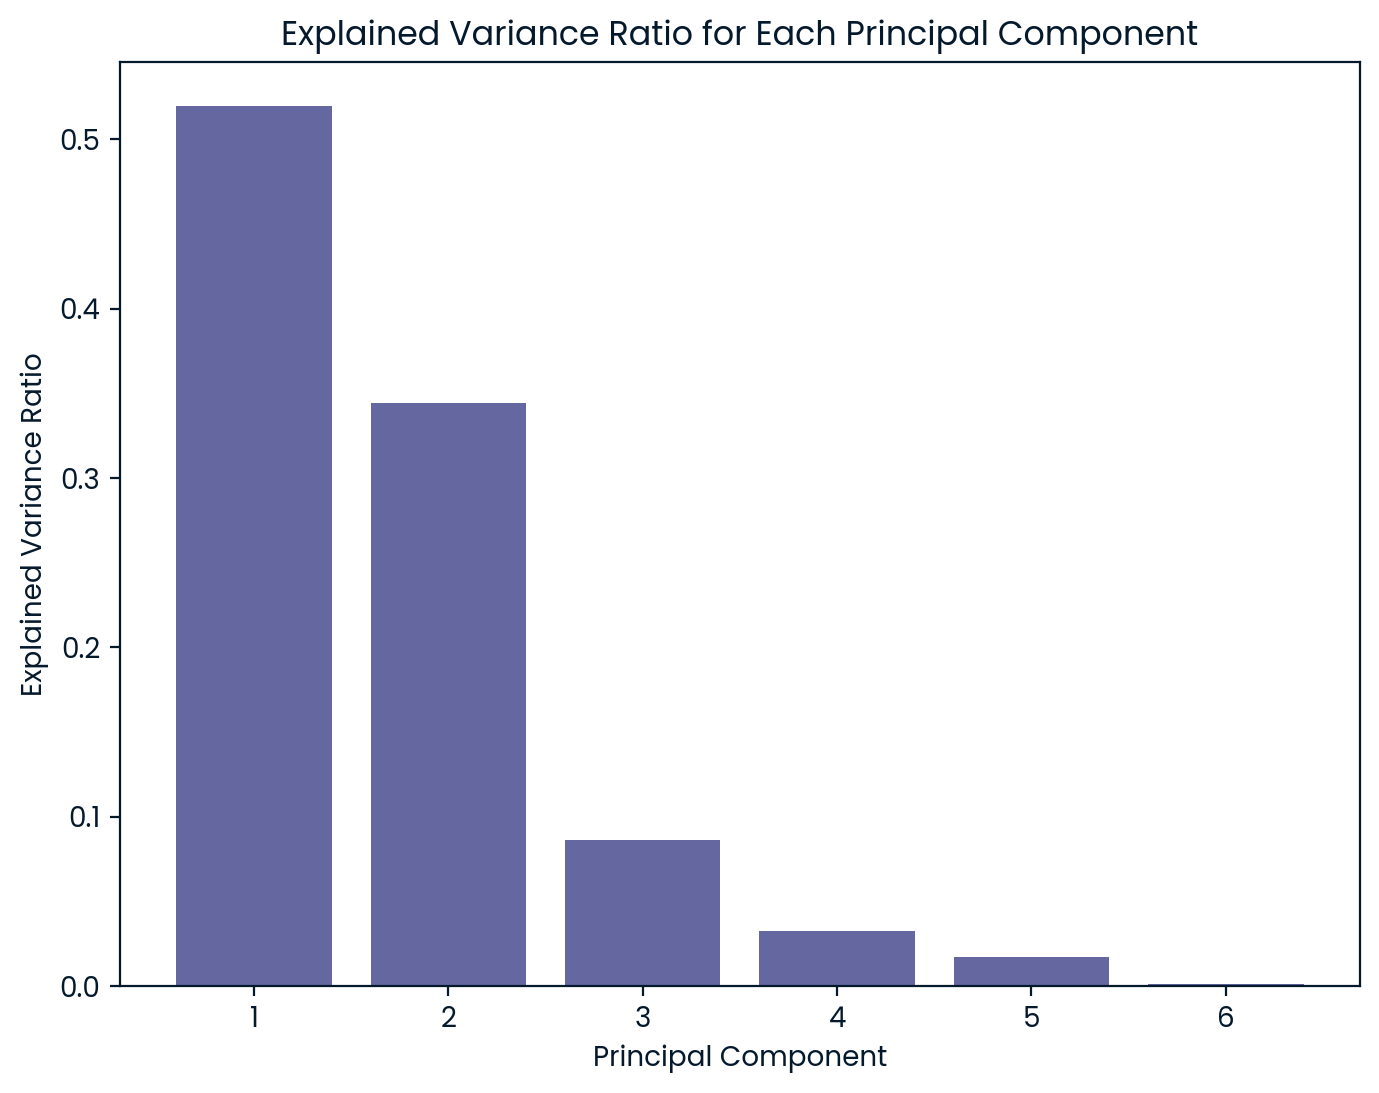

In [149]:
pca = PCA()
dfx_pca = pca.fit(penguins_preprocessed)
explained_variance_ratio = dfx_pca.explained_variance_ratio_

# Plot explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [150]:
## by visaulizing we can see that  n_componet = 2 has explained variance > 0.1
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
n_components

2

In [151]:
#after finding the n_components lets use it and apply
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA

array([[-7.29520694e-01, -2.09719199e+00],
       [-1.92930440e+00,  4.12149703e-01],
       [-1.95352479e+00,  3.08485398e-01],
       [-2.28817761e+00, -1.58277726e-01],
       [-6.21821649e-01, -2.51402049e+00],
       [-2.29152165e+00,  1.26445549e-01],
       [ 2.70680676e-01, -1.85613349e+00],
       [-2.33416049e+00,  1.50781067e-01],
       [-5.97023288e-01, -2.65728372e+00],
       [-2.29097852e+00,  1.91722418e-01],
       [-2.03556313e+00,  1.40926894e-02],
       [ 4.03586127e-01, -2.13984589e+00],
       [-2.78682640e+00, -1.42762052e-01],
       [ 3.26341981e-01, -2.46479526e+00],
       [-2.80192041e+00, -2.54639414e-01],
       [-9.70630285e-01, -2.17804104e+00],
       [-2.25960046e+00, -1.47648262e-01],
       [-4.89541085e-01, -1.79101648e+00],
       [-6.35131373e-01, -1.64334482e+00],
       [-2.35187589e+00, -1.08021864e-01],
       [-6.59573801e-01, -2.04230703e+00],
       [-2.23509243e+00,  1.56193095e-01],
       [-3.04481322e+00, -4.48467094e-01],
       [-5.

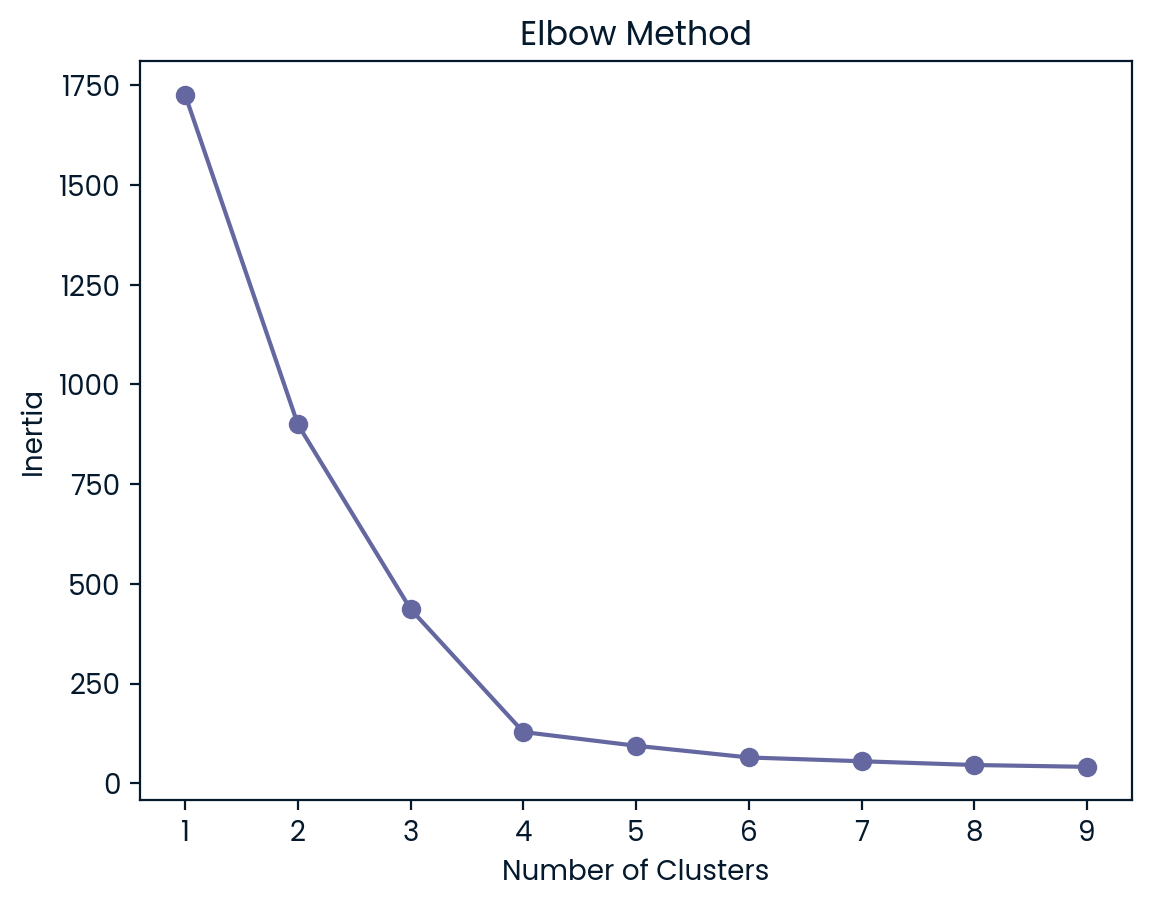

In [152]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42 )
    kmeans.fit(penguins_PCA)  # Fit the KMeans model to the data
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia , marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [153]:
# by looking at the graph we know that the elbow point is 4
n_clusters = 4

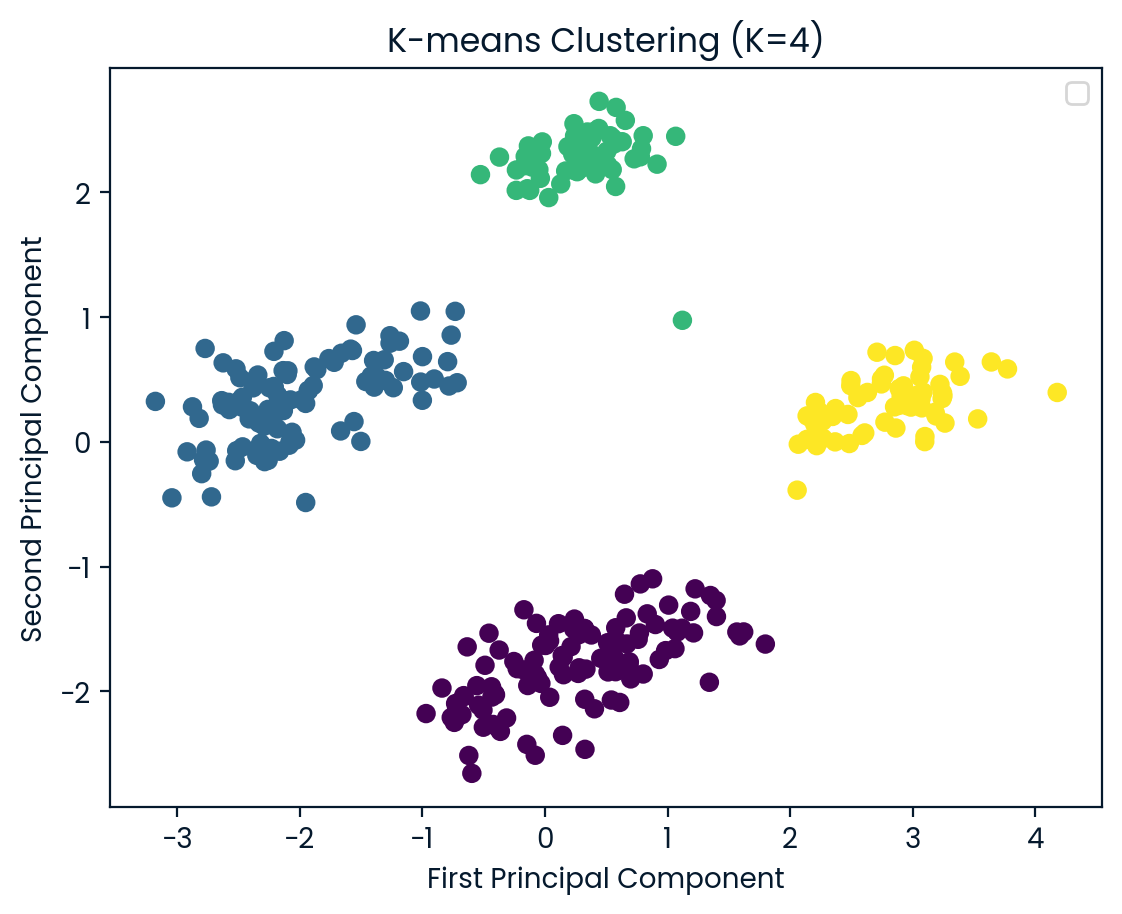

In [154]:
# using the optimal value now 
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [155]:
# adding the labels created by the kmean to cleaned dataset
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
